In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
competitor_df = pd.read_csv("dataset/Competitor_Data.csv")
competitor_df.shape

(50, 5)

In [3]:
competitor_df.head()

,SKU,Avg_Competitor_Price,Lowest_Competitor_Price,Highest_Competitor_Price,Competitor_Count
0,MN-01,$36.90,$31.95,$44.90,9
1,MN-02,$32.50,$27.90,$39.95,8
2,MN-03,$35.20,$29.99,$42.50,7
3,MN-04,$28.40,$24.50,$35.90,6
4,MN-05,$23.90,$18.95,-,3


In [4]:
competitor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   SKU                       50 non-null     object
 1   Avg_Competitor_Price      49 non-null     object
 2   Lowest_Competitor_Price   50 non-null     object
 3   Highest_Competitor_Price  50 non-null     object
 4   Competitor_Count          50 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


In [5]:
#Missing Values Check
competitor_df.isna().sum()

SKU                         0
Avg_Competitor_Price        1
Lowest_Competitor_Price     0
Highest_Competitor_Price    0
Competitor_Count            0
dtype: int64

In [6]:
#Clean Price Columns
price_cols = [
    "Avg_Competitor_Price",
    "Lowest_Competitor_Price",
    "Highest_Competitor_Price"
]


In [7]:
# Clean currency symbols 
competitor_df[price_cols] = (
    competitor_df[price_cols]
    .replace(r"[\$,]", "", regex=True)
    .apply(pd.to_numeric, errors="coerce")
)

In [8]:
# Clean competitor count
competitor_df["Competitor_Count"] = pd.to_numeric(
    competitor_df["Competitor_Count"],
    errors="coerce"
)

In [9]:
#Validate Cleaning
competitor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SKU                       50 non-null     object 
 1   Avg_Competitor_Price      49 non-null     float64
 2   Lowest_Competitor_Price   50 non-null     float64
 3   Highest_Competitor_Price  49 non-null     float64
 4   Competitor_Count          50 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 2.1+ KB


In [10]:
competitor_df[
    competitor_df["Avg_Competitor_Price"].isna() |
    competitor_df["Highest_Competitor_Price"].isna()
]

,SKU,Avg_Competitor_Price,Lowest_Competitor_Price,Highest_Competitor_Price,Competitor_Count
4,MN-05,23.9,18.95,NaN,3
32,MN-33,NaN,21.95,33.9,7


In [11]:
# Impute Avg_Competitor_Price
competitor_df["Avg_Competitor_Price"] = competitor_df["Avg_Competitor_Price"].fillna(
    (competitor_df["Lowest_Competitor_Price"] +
     competitor_df["Highest_Competitor_Price"]) / 2
)

In [12]:
# Impute Highest_Competitor_Price
competitor_df["Highest_Competitor_Price"] = competitor_df["Highest_Competitor_Price"].fillna(
    competitor_df["Avg_Competitor_Price"]
)

In [13]:
competitor_df.isna().sum()

SKU                         0
Avg_Competitor_Price        0
Lowest_Competitor_Price     0
Highest_Competitor_Price    0
Competitor_Count            0
dtype: int64

In [14]:
#Validate Cleaning
competitor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SKU                       50 non-null     object 
 1   Avg_Competitor_Price      50 non-null     float64
 2   Lowest_Competitor_Price   50 non-null     float64
 3   Highest_Competitor_Price  50 non-null     float64
 4   Competitor_Count          50 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 2.1+ KB


In [15]:
# Descriptive Statistics
competitor_df[price_cols + ["Competitor_Count"]].describe()

,Avg_Competitor_Price,Lowest_Competitor_Price,Highest_Competitor_Price,Competitor_Count
count,50.000000,50.000000,50.000000,50.000000
mean,30.720500,25.936800,39.202000,7.360000
std,17.039138,14.290446,20.124736,1.425139
min,0.000000,8.490000,14.900000,3.000000
25%,22.500000,18.950000,28.400000,6.250000
50%,28.850000,24.500000,36.900000,8.000000
75%,32.800000,27.672500,41.412500,8.000000
max,88.200000,74.950000,109.900000,10.000000


In [16]:
# Price Dispersion Analysis
## Create dispersion metric
competitor_df["Price_Spread"] = (
    competitor_df["Highest_Competitor_Price"] - competitor_df["Lowest_Competitor_Price"]
)

In [17]:
competitor_df["Price_Spread"].describe()

count    50.000000
mean     13.265200
std       5.933456
min       4.950000
25%      10.910000
50%      12.000000
75%      13.940000
max      34.950000
Name: Price_Spread, dtype: float64

In [18]:
#Competition Intensity Buckets
## Create competition categories
competitor_df["Competition_Level"] = pd.cut(
    competitor_df["Competitor_Count"],
    bins=[-1, 2, 5, 10, 100],
    labels=["Low", "Medium", "High", "Very High"]
)

In [19]:

competitor_df["Competition_Level"].value_counts()

Competition_Level
High         46
Medium        4
Low           0
Very High     0
Name: count, dtype: int64

In [20]:
## Outlier Detection 
competitor_df.sort_values(
    by="Lowest_Competitor_Price"
).head(5)

,SKU,Avg_Competitor_Price,Lowest_Competitor_Price,Highest_Competitor_Price,Competitor_Count,Price_Spread,Competition_Level
22,MN-23,10.5,8.49,14.9,6,6.41,High
43,MN-44,0.0,9.99,17.9,6,7.91,High
19,MN-20,12.5,9.99,16.9,6,6.91,High
42,MN-43,14.8,11.99,19.9,6,7.91,High
8,MN-09,15.6,11.99,22.9,5,10.91,Medium


In [21]:
competitor_df.sort_values(
    by="Highest_Competitor_Price",
    ascending=False
).head(5)

,SKU,Avg_Competitor_Price,Lowest_Competitor_Price,Highest_Competitor_Price,Competitor_Count,Price_Spread,Competition_Level
47,MN-48,88.2,74.95,109.9,5,34.95,Medium
40,MN-41,82.5,69.95,99.9,6,29.95,High
46,MN-47,80.4,67.99,98.9,6,30.91,High
41,MN-42,76.8,64.99,94.9,6,29.91,High
18,MN-19,38.9,32.95,49.9,7,16.95,High


In [22]:
# Competitor Pressure Score
competitor_df["Low_Price_Pressure"] = (
    competitor_df["Lowest_Competitor_Price"] /
    competitor_df["Avg_Competitor_Price"]
).replace([np.inf, -np.inf], 0)


In [23]:
competitor_df["Low_Price_Pressure"]

0     0.865854
1     0.858462
2     0.851989
3     0.862676
4     0.792887
5     0.822152
6     0.862687
7     0.831731
8     0.768590
9     0.826829
10    0.842135
11    0.838785
12    0.826033
13    0.861511
14    0.847768
15    0.843284
16    0.856825
17    0.850694
18    0.847044
19    0.799200
20    0.822078
21    0.819635
22    0.808571
23    0.814904
24    0.844789
25    0.853618
26    0.835786
27    0.837786
28    0.831140
29    0.851374
30    0.837248
31    0.836000
32    0.786034
33    0.828107
34    0.819149
35    0.830233
36    0.848639
37    0.833013
38    0.812016
39    0.801205
40    0.847879
41    0.846224
42    0.810135
43    0.000000
44    0.826433
45    0.828720
46    0.845647
47    0.849773
48    0.844411
49    0.826159
Name: Low_Price_Pressure, dtype: float64

In [24]:
# Pricing Power Index- Higher index means more room to increase prices
competitor_df["Pricing_Power_Index"] = (
    competitor_df["Price_Spread"] /
    competitor_df["Avg_Competitor_Price"]
).replace([np.inf, -np.inf], 0)


In [25]:
competitor_df["Pricing_Power_Index"]

0     0.350949
1     0.370769
2     0.355398
3     0.401408
4     0.207113
5     0.538608
6     0.389552
7     0.447115
8     0.699359
9     0.485366
10    0.478090
11    0.464953
12    0.475620
13    0.429856
14    0.487054
15    0.475124
16    0.409841
17    0.430556
18    0.435733
19    0.552800
20    0.472294
21    0.454338
22    0.610476
23    0.478365
24    0.420000
25    0.425987
26    0.431773
27    0.456107
28    0.480263
29    0.409615
30    0.434564
31    0.433091
32    0.427932
33    0.441124
34    0.454407
35    0.428904
36    0.406463
37    0.445833
38    0.463178
39    0.479920
40    0.363030
41    0.389453
42    0.534459
43    0.000000
44    0.444268
45    0.448097
46    0.384453
47    0.396259
48    0.421450
49    0.461921
Name: Pricing_Power_Index, dtype: float64

### Competition vs Dispersion Matrix

| Competition | Price Spread | Strategy                    |
| ----------- | ------------ | --------------------------- |
| High        | Low          | Match market, defend margin |
| High        | High         | Tactical pricing            |
| Low         | High         | Premium opportunity         |
| Low         | Low          | Stable pricing              |


In [26]:
# Market Segmentation Logic
median_spread = competitor_df["Price_Spread"].median()
competitor_df["Market_Type"] = np.where(
    (competitor_df["Competitor_Count"] > 5) & (competitor_df["Price_Spread"] < median_spread),
    "Commoditized",
    np.where(
        (competitor_df["Competitor_Count"] <= 5) & (competitor_df["Price_Spread"] >= median_spread),
        "Differentiated",
        "Mixed"
    )
)

In [27]:
competitor_df["Market_Type"].value_counts()

Market_Type
Mixed             27
Commoditized      22
Differentiated     1
Name: count, dtype: int64

In [28]:
# Identify “False Competition"
competitor_df["Extreme_Low_Price"] = (
    competitor_df["Lowest_Competitor_Price"] <
    competitor_df["Avg_Competitor_Price"] * 0.75
)


In [29]:
competitor_df["Extreme_Low_Price"].value_counts()

Extreme_Low_Price
False    50
Name: count, dtype: int64

In [30]:
competitor_signals = competitor_df[[
    "SKU",
    "Competition_Level",
    "Pricing_Power_Index",
    "Market_Type"
]].copy()


In [31]:
competitor_signals["High_Competitive_Pressure"] = (
    competitor_signals["Competition_Level"].isin(["High", "Very High"])
)

In [32]:
#Save competitor signals properly
competitor_signals.to_csv(
    "final_outputs/competitor_signals.csv",
    index=False
)

C:\Users\pc\AppData\Local\Temp\ipykernel_26344\3438271869.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=competitor_df, x='Market_Type', palette='viridis', order=["Commoditized", "Mixed", "Differentiated"])


Text(0.5, 1.0, 'SKU Distribution by Market Category')

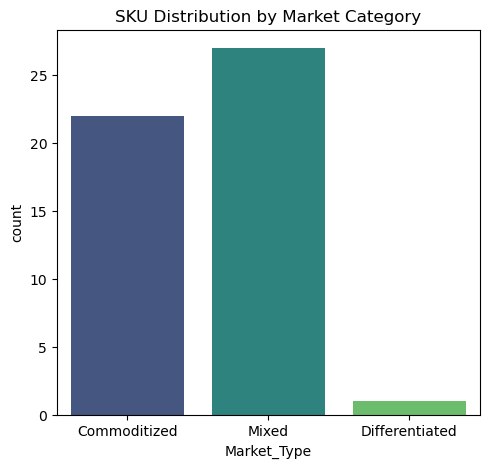

In [33]:
# Visualization
plt.figure(figsize=(12, 5))

# Plot 1: Market Segmentation
plt.subplot(1, 2, 1)
sns.countplot(data=competitor_df, x='Market_Type', palette='viridis', order=["Commoditized", "Mixed", "Differentiated"])
plt.title('SKU Distribution by Market Category')

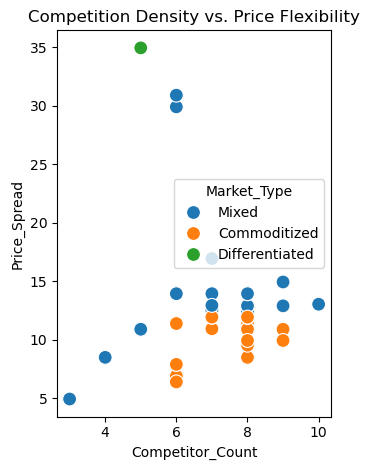

In [34]:
# Plot 2: Price Spread vs Competition
plt.subplot(1, 2, 2)
sns.scatterplot(data=competitor_df, x='Competitor_Count', y='Price_Spread', hue='Market_Type', s=100)
plt.title('Competition Density vs. Price Flexibility')
plt.tight_layout()
plt.savefig('competitor_analysis_plots.png')

In [ ]:
# Extracting Key Actionable Lists
print("--- ACTIONABLE INSIGHTS REPORT ---")

# List 1: Margin Opportunities (High Pricing Power)
# These are SKUs where you can likely raise prices.
margin_opps = competitor_df.nlargest(5, 'Pricing_Power_Index')[['SKU', 'Pricing_Power_Index', 'Avg_Competitor_Price']]
print("\nTop 5 SKUs to consider for margin increases:")
print(margin_opps)

# List 2: Vulnerable SKUs (High Competition)
# These require price matching or aggressive monitoring.
vulnerable_skus = competitor_df.nlargest(5, 'Competitor_Count')[['SKU', 'Competitor_Count', 'Avg_Competitor_Price']]
print("\nTop 5 SKUs requiring strict price monitoring:")
print(vulnerable_skus)

# List 3: Commoditized SKUs
# Focus on efficiency and volume here, not margin.
commoditized = competitor_df[competitor_df['Market_Type'] == 'Commoditized'].head(5)[['SKU', 'Price_Spread']]
print("\nSample of highly commoditized SKUs (Focus on turnover):")
print(commoditized)

# 6. Export for Business Use
competitor_df.to_csv('final_competitor_insights.csv', index=False)
print("\nAnalysis complete. 'final_competitor_insights.csv' and plots have been generated.")

--- ACTIONABLE INSIGHTS REPORT ---

[UPWARD PRICE POTENTIAL] Top 5 SKUs to consider for margin increases:
      SKU  Pricing_Power_Index  Avg_Competitor_Price
8   MN-09             0.699359                  15.6
22  MN-23             0.610476                  10.5
19  MN-20             0.552800                  12.5
5   MN-06             0.538608                  15.8
42  MN-43             0.534459                  14.8

[PRICE PROTECTION] Top 5 SKUs requiring strict price monitoring:
      SKU  Competitor_Count  Avg_Competitor_Price
6   MN-07                10                  33.5
0   MN-01                 9                  36.9
9   MN-10                 9                  20.5
11  MN-12                 9                  21.4
14  MN-15                 9                  22.4

[VOLUME FOCUS] Sample of highly commoditized SKUs (Focus on turnover):
      SKU  Price_Spread
3   MN-04         11.40
9   MN-10          9.95
10  MN-11          8.51
11  MN-12          9.95
12  MN-13         

### Pricing adjustment logic 
- IF Competition_Level is High AND Pricing_Power_Index is Low:
    → Keep price near Avg_Competitor_Price
- ELSE IF Competition_Level is Low AND Pricing_Power_Index is High:
    → Allow price above Avg_Competitor_Price
- ALWAYS:
    → Price ≥ Floor_Price
